<a href="https://colab.research.google.com/github/yadgire7/Machine-Learning/blob/master/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Saurabh Arun Yadgire
USC ID: 8065527198
Github ID:yadgire7

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import ttest_ind
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm


Resources:
1. https://stackoverflow.com/questions/17834995/how-to-convert-opendocument-spreadsheets-to-a-pandas-dataframe
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
3. Documentation of the libraires used
4. TAs for doubt solving

# Read Data

In [ ]:
print('Q.1.a Completed')
df = pd.read_excel(io=r"../Data/ccpp.ods",sheet_name='Sheet1',engine="odf")

Q.1.a Completed


In [ ]:
print('Q.1.b \n')
print('Q.1.b.i \n')
rows,columns = df.shape
print('Number of rows in the dataset = ',rows)
print('Number of columns in the dataset = ',columns)
df.rename({"AT":"temperature","V":"vacuum","AP":"pressure","RH":"humidity","PE":"output_energy"},inplace=True,axis=1)
print('\nFollowing is the information about the data:\n',df)
print('\nDatatype of columns:\n',df.dtypes)

Q.1.b 

Q.1.b.i 

Number of rows in the dataset =  9568
Number of columns in the dataset =  5

Following is the information about the data:
       temperature  vacuum  pressure  humidity  output_energy
0           14.96   41.76   1024.07     73.17         463.26
1           25.18   62.96   1020.04     59.08         444.37
2            5.11   39.40   1012.16     92.14         488.56
3           20.86   57.32   1010.24     76.64         446.48
4           10.82   37.50   1009.23     96.62         473.90
...           ...     ...       ...       ...            ...
9563        16.65   49.69   1014.01     91.00         460.03
9564        13.19   39.18   1023.67     66.78         469.62
9565        31.32   74.33   1012.92     36.48         429.57
9566        24.48   69.45   1013.86     62.39         435.74
9567        21.60   62.52   1017.23     67.87         453.28

[9568 rows x 5 columns]

Datatype of columns:
 temperature      float64
vacuum           float64
pressure         float64
humi

# Visualize pairwise interaction

Q.1.b.ii 



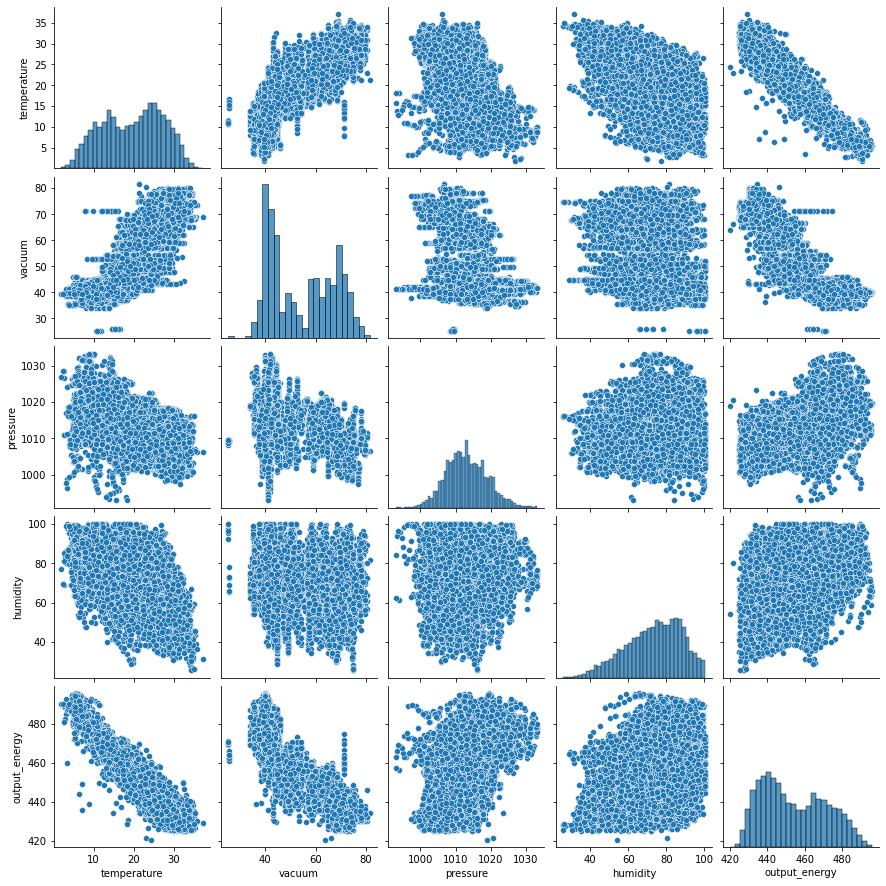

In [ ]:
print('Q.1.b.ii \n')
pair_plt = sbn.pairplot(df,diag_kind='hist')

Findings:

1. As temperature increases, output energy decreses.(plot[5][1])

temp=sbn.lineplot(x=df['output_energy'],y=df['humidity'])
2. There is a minimal impact of humidity for a  small range of output energy

3. The output energy decreases with increasing vacuum parameter.(plot[5][2])

temp=sbn.lineplot(x=df['pressure'],y=df['output_energy'])
4. With incresesing pressure, the output energy increases grudually.

In [ ]:
print('Q.1.b.iii \n')
df.describe()



Q.1.b.iii 



,temperature,vacuum,pressure,humidity,output_energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
print(df)

      temperature  vacuum  pressure  humidity  output_energy
0           14.96   41.76   1024.07     73.17         463.26
1           25.18   62.96   1020.04     59.08         444.37
2            5.11   39.40   1012.16     92.14         488.56
3           20.86   57.32   1010.24     76.64         446.48
4           10.82   37.50   1009.23     96.62         473.90
...           ...     ...       ...       ...            ...
9563        16.65   49.69   1014.01     91.00         460.03
9564        13.19   39.18   1023.67     66.78         469.62
9565        31.32   74.33   1012.92     36.48         429.57
9566        24.48   69.45   1013.86     62.39         435.74
9567        21.60   62.52   1017.23     67.87         453.28

[9568 rows x 5 columns]


In [ ]:
print('Q.1.c\n')
x_train= df.iloc[:,0:-1]
x1=df['temperature']
x2=df['vacuum']
x3=df['pressure']
x4=df['humidity']
y_actual = df['output_energy']


mod1 = LinearRegression()
mod1.fit(x1.to_numpy().reshape(-1,1),y_actual)
p1 = mod1.predict(x1.to_numpy().reshape(-1,1))
sm1= sm.OLS(y_actual,x1.to_numpy().reshape(-1,1)).fit()
print(sm1.summary())

mod2 = LinearRegression()
mod2.fit(x2.to_numpy().reshape(-1,1),y_actual)
p2 = mod2.predict(x2.to_numpy().reshape(-1,1))
sm2= sm.OLS(y_actual,x2.to_numpy().reshape(-1,1)).fit()
print(sm2.summary())

mod3 = LinearRegression()
mod3.fit(x3.to_numpy().reshape(-1,1),y_actual)
p3 = mod3.predict(x3.to_numpy().reshape(-1,1))
sm3= sm.OLS(y_actual,x3.to_numpy().reshape(-1,1)).fit()
print(sm3.summary())

mod4 = LinearRegression()
mod4.fit(x4.to_numpy().reshape(-1,1),y_actual)
sm4= sm.OLS(y_actual,x4.to_numpy().reshape(-1,1)).fit()
print(sm4.summary())


Q.1.c

                                 OLS Regression Results                                
Dep. Variable:          output_energy   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          5.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:59:24   Log-Likelihood:                         -63065.
No. Observations:                9568   AIC:                                  1.261e+05
Df Residuals:                    9567   BIC:                                  1.261e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Inferences:
1. As temperature increases, output energy decreases (negative slope of plot 1)
2. As vacuum increases, output energy decreases (negative slope of plot 2)
3. As pressure increases, output energy increases (positive slope of plot 3)
4. As humidity increases, output energy increases (positive slope of plot 3)
****************
5. Among all the 4 predictors, 'temperature' is the most significant predictor as it has the lowest R2 error and the actual output data is closely bound to the predicted data(plot 1)
6. Among all the 4 predictors, 'humidity' is the least significant predictor as it has the largest R2 and the actual output data is sparsely bound to the predicted data(plot 1)
7. As the p-value for all the predictors is 0, therefore it can be inferred that all the predictors are significant.

# Detect outliers

In [ ]:
print('contd. (Outliers detection)\n')
sd1 = df['temperature'].std()
sd2 = df['vacuum'].std()
sd3 = df['humidity'].std()
sd4 = df['pressure'].std()

# reference: https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html
def detectOutliers(arr,std):
    std_arr=[]
    for i in range(0,len(arr)):
        if arr[i]>(std+(3*std)) or arr[i]<(std-(3*std)):
            std_arr.append(arr[i])
    return std_arr
o1 = detectOutliers(x1.to_numpy(),sd1)
o2 = detectOutliers(x2.to_numpy(),sd2)
o3 = detectOutliers(x3.to_numpy(),sd3)
o4 = detectOutliers(x4.to_numpy(),sd4)
print('\ntemperature outliers: ',o1)
print('\nvacuum outliers: ',o2)
print('\npressure outliers: ',o3)
print('\nhumidity outliers: ',o4)

contd. (Outliers detection)


temperature outliers:  [30.53, 31.07, 32.57, 32.72, 35.56, 33.01, 30.16, 33.79, 32.21, 30.38, 31.24, 30.28, 30.08, 30.72, 30.15, 29.92, 29.82, 31.38, 29.91, 29.87, 32.63, 31.38, 30.1, 30.24, 32.33, 30.05, 30.19, 30.56, 33.73, 29.87, 30.35, 29.89, 32.22, 31.97, 31.68, 32.51, 31.1, 31.27, 29.96, 30.72, 31.26, 32.09, 30.69, 30.58, 31.06, 31.79, 34.3, 30.9, 31.19, 32.82, 30.15, 30.55, 29.86, 30.2, 31.32, 31.59, 30.8, 32.63, 30.04, 32.07, 30.67, 32.48, 30.7, 31.17, 30.9, 32.77, 31.45, 31.6, 30.56, 33.27, 29.94, 30.97, 30.22, 30.07, 30.33, 31.01, 31.87, 30.42, 31.81, 31.42, 31.63, 30.93, 31.73, 31.01, 30.63, 33.96, 31.38, 31.15, 31.76, 30.47, 30.55, 32.14, 30.27, 33.4, 29.97, 30.91, 31.54, 31.9, 34.35, 30.67, 31.09, 30.4, 32.92, 31.23, 30.98, 32.12, 31.43, 31.65, 30.2, 30.18, 31.25, 29.99, 32.0, 32.9, 30.15, 30.47, 30.09, 32.56, 32.41, 30.24, 30.78, 33.01, 30.25, 34.15, 31.35, 31.98, 33.33, 31.46, 32.98, 32.14, 31.84, 31.15, 30.74, 33.26, 31.11, 30.22, 31.54, 30

# Regression Model considering all variables

1.d

                                 OLS Regression Results                                
Dep. Variable:          output_energy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:59:24   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

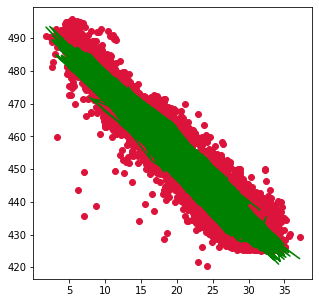

In [ ]:
print('1.d\n')
multi_reg_mod = LinearRegression()
multi_reg_mod.fit(x_train,y_actual)
pred_mod = multi_reg_mod.predict(x_train)
s_multi = sm.OLS(y_actual,x_train)
res_multi=s_multi.fit()
print(res_multi.summary())
plt.figure(figsize=(5,5))
plt.scatter(x1,y_actual,c='crimson')
plt.plot(x1,pred_mod,'g-')
# *******************



# Checking Null Hypothesis

Inference:
1. We must reject null hypothesis for all the predictors as the p-value for all the predictors is 0
2. The plot is shows actual data points (red) and predicted data points using multiple linear regression (green) for predictor = temperature

The p-values for all the predictors are zero, thus we reject Null Hypothesis for each predictor.

1.e



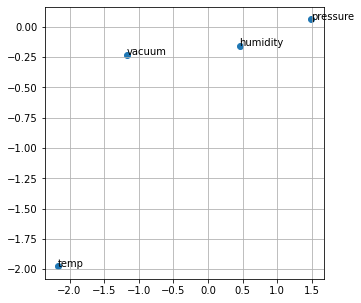

In [ ]:
print('1.e\n')
# reference: https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend.py

def get_mean(x):
    return x.mean()
def beta_one(var,y):
    ans=0
    x_mean=get_mean(var)
    y_mean=get_mean(y)
    num=0
    den=0
    for i in range(0,len(var)):
        num = num + (var[i]-x_mean)*(y[i]-y_mean)
        den = den + ((var[i]-x_mean)**2)
    ans = num/den
    return ans


x_e =[]
b1=beta_one(x1.to_numpy(),y_actual)
x_e.append(b1)
b2=beta_one(x2.to_numpy(),y_actual)
x_e.append(b2)
b3=beta_one(x3.to_numpy(),y_actual)
x_e.append(b3)
b4=beta_one(x4.to_numpy(),y_actual)
x_e.append(b4)
# print(x_e)
y_e=multi_reg_mod.coef_
label_arr=['temp','vacuum','pressure','humidity']
# print(y_e)
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x_e,y_e)
ax.grid()
for i, txt in enumerate(label_arr):
    ax.annotate(txt, (x_e[i], y_e[i]))
plt.show()

In [ ]:
print('1.f\n')
x_poly = PolynomialFeatures(degree=3,interaction_only=False)
temp_poly=x_poly.fit_transform(x1.to_numpy().reshape(-1,1))
vac_poly=x_poly.fit_transform(x2.to_numpy().reshape(-1,1))
pres_poly =x_poly.fit_transform(x3.to_numpy().reshape(-1,1))
hum_poly = x_poly.fit_transform(x4.to_numpy().reshape(-1,1))
# *************************

sm_temp =sm.OLS(y_actual,temp_poly).fit()
res_poly_temp = sm_temp.summary()

# **************************
sm_vac = sm.OLS(y_actual,vac_poly).fit()
res_poly_vac =sm_vac.summary()

# ************************

sm_pres = sm.OLS(y_actual,pres_poly).fit()
res_poly_pres = sm_pres.summary()

# ****************************

sm_hum = sm.OLS(y_actual,hum_poly).fit()
res_poly_hum = sm_hum.summary()




In [ ]:
print(res_poly_vac)

The p-value for each degree is 0. So, we can reject the null hypothesis. This means that temperature affects the output variable polynomially.

In [ ]:
print(res_poly_vac)

In this case , only the first degree p-value is zero and the second degree (x^2) and third degree (x^3) p-values are more than 0.05. Thus, we cannot neglect null hypothesis, means that vacuum does not affect the output variable polynomially.

In [ ]:
print(res_poly_pres)

All the p-values are 0. thus we can neglect the null hypothesis. Therefore presuure variable affects the output variable polynomially.

In [ ]:
print(res_poly_hum)

In this case too, all the p-values are 0, meaning that null hypothesis can be rejected.

Considering alpha =0.05:
1. x1 and x9 have larger p-values , they satisfy the condition for null hypothesis and hence, can be rejcted.
2. x7 and x8 have the least p-values(0 hence can be considered the most significant features.
3. The R^2 value is close to 1, means that the output variables explain the relation between the preictors well.
{x1=Temperature,x2=Vacuum,x3=pressure,x4=humidity,x5=temperature+vacuum,x6=temperature+pressure,x7=temperatue+humidity,x8=vacuum+pressure,x9=vacuum+humidity,x10=pressure+humidity}

The R-squared value is 1.000, which means that the predictors have been model accurately. The p-value for each predictor is 0 therefore we can reject null hypothesis and infer that all the predictors are significant.

In [ ]:
print('Q.1.g\n')
mod_g = PolynomialFeatures(degree=2,interaction_only=True)
pair_poly = mod_g.fit_transform(x_train)
mod_poly = sm.OLS(y_actual,pair_poly).fit()
res_poly = mod_poly.summary()
print(res_poly)

In [ ]:
print('Q.1.h Part 1\n')
xTrain,x_test,y_train,y_test = train_test_split(x_train,y_actual,train_size=0.70)
mod_h_train = sm.OLS(y_train,xTrain).fit()
pred_h_train =mod_h_train.predict(xTrain)
mod_h_test = sm.OLS(y_train,xTrain).fit()
pred_h_test = mod_h_test.predict(x_test)
res_h = mod_h_train.summary()
train_rmse_lr = math.sqrt(mean_squared_error(y_train,pred_h_train))
test_rmse_lr = math.sqrt(mean_squared_error(y_test,pred_h_test))
print('Train RMSE for LR = ',train_rmse_lr)
print('Test RMSE for LR = ',test_rmse_lr)

poly_h = PolynomialFeatures(degree=2,interaction_only=False)


In [ ]:
print('Q.1.h Part 2\n')
print('The feature x1 and x9 are insignificant as seen above so we need to remove these features.\n')

# print(pair_poly.shape)
new_pair_poly=pair_poly
new_pair_poly=np.delete(new_pair_poly,obj=(0,8),axis=1)
# print(new_pair_poly.shape)
mod_poly_h = sm.OLS(y_actual,new_pair_poly).fit()

print('The RMSE for the model is: ',math.sqrt(mod_poly_h.mse_total))

# KNN Regression Model

In [ ]:
print('Q.1.i raw\n')
train_rmse_knn=[]
test_rmse_knn=[]
k_arr=[]
k=[]


for i in range(1,101):
    knn=KNeighborsRegressor(n_neighbors=i)
    mod_i_train=knn.fit(xTrain,y_train)
    pred_i_train = mod_i_train.predict(xTrain)
    train_rmse_knn.append(math.sqrt(mean_squared_error(y_train,pred_i_train)))
#     ****************

    pred_i_test = mod_i_train.predict(x_test)
    test_rmse_knn.append(math.sqrt(mean_squared_error(y_test,pred_i_test)))
    k.append(i)
    k_arr.append(1/i)


# print(df_i)

plt.grid()
plt.plot(k_arr,train_rmse_knn,'b-',label = "Train RMSE (KNN raw)")
plt.plot(k_arr,test_rmse_knn,'r-',label="Test RMSE (KNN raw)")
plt.xlabel('1/K')
plt.ylabel('Train and Test RMSE')
plt.legend()

In [ ]:
print('Q.1.i normalized\n')
scaler =MinMaxScaler()
temp_data=scaler.fit_transform(x_train)
# print(temp_data)
norm_x_train,norm_x_test,norm_y_train,norm_y_test =train_test_split(temp_data,y_actual,train_size=0.70)
train_rmse_knn_norm=[]
test_rmse_knn_norm=[]
for i in range(1,101):
    knn_norm=KNeighborsRegressor(n_neighbors=i)
    mod_i_train_norm=knn_norm.fit(norm_x_train,norm_y_train)
    pred_i_train_norm = mod_i_train_norm.predict(norm_x_train)
    train_rmse_knn_norm.append(math.sqrt(mean_squared_error(norm_y_train,pred_i_train_norm)))
#     ****************
    mod_i_test_norm = knn_norm.fit(norm_x_train,norm_y_train)
    pred_i_test_norm = mod_i_test_norm.predict(norm_x_test)
    test_rmse_knn_norm.append(math.sqrt(mean_squared_error(norm_y_test,pred_i_test_norm)))

plt.grid()
plt.plot(k_arr,train_rmse_knn_norm,'b-',label = "Train RMSE (KNN norm)")
plt.plot(k_arr,test_rmse_knn_norm,'r-',label="Test RMSE (KNN norm)")
plt.xlabel('1/K')
plt.ylabel('Train and Test RMSE')
plt.legend()
# ******************************************


In [ ]:
print('Q.1.i best k\n')
#  knn with best k
for i in range(0,len(k)):
    if test_rmse_knn[i] == min(test_rmse_knn):
        best_k_test = k[i]
    if test_rmse_knn_norm[i] == min(test_rmse_knn_norm):
        best_k_test_norm = k[i]

print('Best K for KNN using raw data = ',best_k_test)
print('Best K for KNN using normalized data = ',best_k_test_norm)


In [ ]:
print('Q.1.j\n')
print('SUMMARY:\nTrain RMSE for LR = ',train_rmse_lr)
print('Test RMSE for LR = ',test_rmse_lr)
print('The test RMSE(least) for KNN using raw data is: ',test_rmse_knn[best_k_test])
print('The test RMSE(least) for KNN using normalized data is: ',test_rmse_knn_norm[best_k_test_norm])
print('Thus normalizing (data preprocessing) data helps in reducinf the RMSE and improve the performance of the model.')